In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.style.use('seaborn-dark')

In [33]:
ja = 2.0 
jr = 1.5
RQD = 96

GSI = ((52*(jr/ja))/ (1+(jr/ja))) + (RQD/2)


In [34]:

sigci = 63
mi = 12 
d= 0.4
unit_weight = 0.025
depth = 150 


In [35]:
mb = mi * np.exp((GSI-100)/(28-(14*d)))
s = np.exp((GSI-100)/(9-(3*d)))
a= (1/2)+(1/6)*(np.exp(-GSI/15)-np.exp(-20/3))
print(mb, a ,s)


3.184757148291955 0.5013255847258639 0.022158728220451635


In [36]:
def hoek_brown(min_sig3, max_sig3, num_values):
    sig3 = np.linspace(min_sig3, max_sig3, num_values, endpoint=True)
    sig1 = sig3 + sigci * ((mb * (sig3/sigci))+s)**a
    sig_array = pd.DataFrame(data=np.vstack([sig3, sig1]).T, columns=['sig3', 'sig1'])

    sig_array['ds1ds3'] = 1+a*mb*(mb*(sig3/sigci)+s)**(a-1)
    sig_array['sign'] = ((sig1 + sig3)/2) - ((sig1 - sig3)/2) * (sig_array['ds1ds3'] - 1) / (sig_array['ds1ds3'] + 1)
    sig_array['tau'] = (sig1-sig3)*np.sqrt(sig_array['ds1ds3'])/(sig_array['ds1ds3']+1)

    return sig_array

In [37]:
sig_array = hoek_brown(0,5,40)
sig_array.dropna(inplace = True)
sig_array

,sig3,sig1,ds1ds3,sign,tau
0,0.000000,9.330821,11.671627,0.736355,2.515667
1,0.128205,10.739771,10.390018,1.059860,3.003055
2,0.256410,12.010640,9.481772,1.377807,3.453061
3,0.384615,13.180360,8.794894,1.690984,3.874192
4,0.512821,14.271848,8.251949,1.999970,4.272015
5,0.641026,15.300486,7.808792,2.305211,4.650435
6,0.769231,16.277189,7.438173,2.607064,5.012326
7,0.897436,17.210039,7.122238,2.905824,5.359889
8,1.025641,18.105213,6.848736,3.201733,5.694852
9,1.153846,18.967562,6.608944,3.495001,6.018610


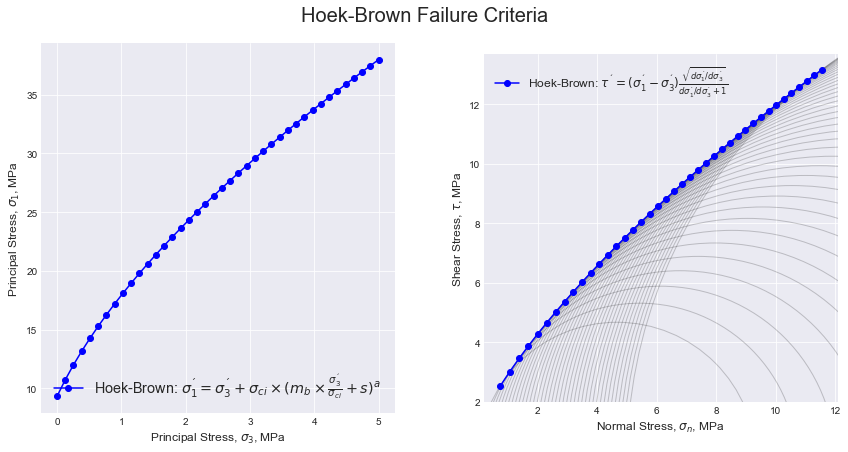

In [38]:
# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

sig1_formula = r'\sigma_1^{´}=\sigma_3^{´} + \sigma_{ci} \
            \times (m_b \times \frac{\sigma_3^{´}}{\sigma_{ci}} + s)^a'


ax.plot(sig_array.sig3.values, sig_array.sig1.values, 'bo-',
        label='Hoek-Brown: ' + sig1_formula.join(r'$$')); 
ax.set_xlabel(u'Principal Stress, $\sigma_3$, MPa', fontsize=12)
ax.set_ylabel(u'Principal Stress, $\sigma_1$, MPa', fontsize=12)

ax.grid(); ax.legend(fontsize='x-large')

ax = fig.add_subplot(122)

tau_formula = r'\tau^{´} = (\sigma_1^{´} - \sigma_3^{´}) \
             \frac{\sqrt{d\sigma_1^{´}/d\sigma_3^{´}}}{d\sigma_1^{´}/d\sigma_3^{´} + 1}'

ax.plot(sig_array['sign'], sig_array['tau'], 'bo-',
    label='Hoek-Brown: ' + tau_formula.join(r'$$'))
ax.set_xlabel(u'Normal Stress, $\sigma_n$, MPa', fontsize=12)
ax.set_ylabel(u'Shear Stress, $\u03C4$, MPa', fontsize=12)

# Add Mohr circles for the invervals that were defined above.

centers = ((sig_array.sig1.values - sig_array.sig3.values) / 2) + sig_array.sig3.values
radius = sig_array.sig1.values - centers

for r, c in zip(radius, centers):
    ax.add_patch(plt.Circle([c, 0], r, facecolor='none', ec='k', alpha=.2))

ax.grid()
ax.set_aspect('equal')
ax.legend(fontsize='large')

fig.suptitle('Hoek-Brown Failure Criteria', fontsize=20, y=1.05)
fig.tight_layout(pad=1.5)
fig.savefig('haha.png', dpi=200)

In [39]:
sigcm = sigci * (mb+4*s-a*(mb-8*s))*(((mb/4)+s)**(a-1))/(2*(1+a)*(2+a))

sigt = -s*sigci/mb

In [40]:
sig3_max = sigcm * 0.72 * (sigcm / (unit_weight * depth))**(-.91)

In [41]:
sig_array_relat = hoek_brown(sigt, sig3_max, 25)
sig_array_relat.dropna(inplace=True)
sig_array_relat = sig_array_relat

In [42]:
from sklearn.linear_model import LinearRegression

# Define a LinearRegression model

lr = LinearRegression()

# Fit a line using the Principal Stresses
lr.fit(sig_array_relat.sig3.values.reshape(-1, 1), sig_array_relat.sig1.values.reshape(-1, 1))

# Predict the values
sig1_mohr = lr.predict(sig_array_relat.sig3.values.reshape(-1, 1)).ravel()

# Calculate the friction angle
k = lr.coef_.squeeze()
phi = np.abs(np.rad2deg(np.arcsin((1 - k)/(1 + k))))


# Fit another line using the Normal and Shear Stresses
lr.fit(sig_array_relat['sign'].values.reshape(-1, 1), sig_array_relat['tau'].values.reshape(-1, 1))

# Predict the values
tau_mohr = lr.predict(sig_array_relat['sign'].values.reshape(-1, 1)).ravel()

# Calculate the cohesion strength
coh = lr.predict([[0]]).squeeze()

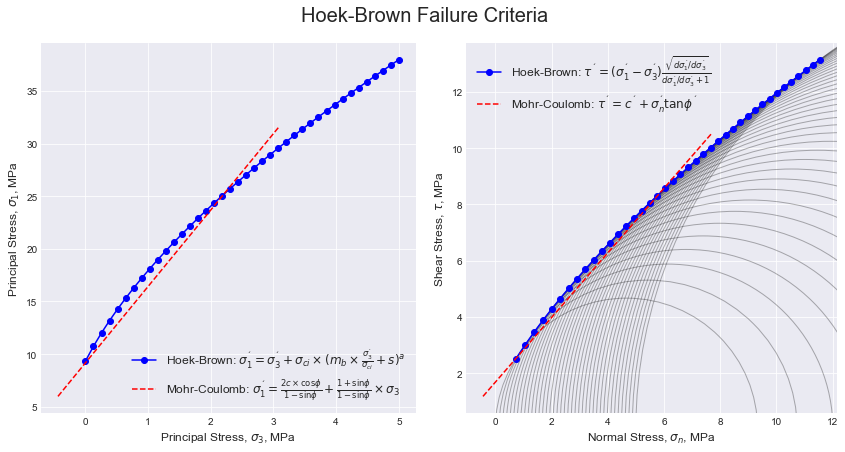

In [43]:
# Plot
plt.style.use('seaborn-dark')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

sig1_formula_mohr = r'\sigma_1^{´}=\frac{2c \times \cos{\phi}}{1-\sin{\phi}}+\frac{1+\sin{\phi}}{1-\sin{\phi}} \times \sigma_3'

ax.plot(sig_array.sig3.values, sig_array.sig1.values, 'bo-', label='Hoek-Brown: ' + sig1_formula.join(r'$$')); 
ax.plot(sig_array_relat.sig3.values, sig1_mohr, 'r--', label='Mohr-Coulomb: ' + sig1_formula_mohr.join(r'$$'))
ax.set_xlabel(u'Principal Stress, $\sigma_3$, MPa', fontsize=12)
ax.set_ylabel(u'Principal Stress, $\sigma_1$, MPa', fontsize=12)

ax.grid(); ax.legend(fontsize='large')

ax = fig.add_subplot(122)

tau_formula_mohr = r'\tau^{´} = c^{´} + \sigma_n^{´}\tan{\phi}^{´}'

ax.plot(sig_array['sign'], sig_array['tau'],
        'bo-', label='Hoek-Brown: ' + tau_formula.join(r'$$'))
ax.plot(sig_array_relat['sign'], tau_mohr,
        'r--', label='Mohr-Coulomb: ' + tau_formula_mohr.join(r'$$'))
ax.set_xlabel(u'Normal Stress, $\sigma_n$, MPa', fontsize=12)
ax.set_ylabel(u'Shear Stress, $\u03C4$, MPa', fontsize=12)

centers = ((sig_array.sig1.values - sig_array.sig3.values) / 2) + sig_array.sig3.values
radius = sig_array.sig1.values - centers

for r, c in zip(radius, centers):
    ax.add_patch(plt.Circle([c, 0], r, facecolor='none', ec='k', alpha=.3))

ax.grid()
ax.set_aspect('equal')
ax.legend(fontsize='large')

fig.suptitle('Hoek-Brown Failure Criteria', fontsize=20, y=1.05)
fig.tight_layout(pad=1.5)
fig.savefig('hehe.png', dpi=200)

In [44]:
sigtm = 0.5*sigci*(mb-np.sqrt((mb**2)+4*s))

Em = (1 - (d/2)) * (np.sqrt(sigci/100.0)*10**((GSI-10)/40.0)) * 10**3

In [45]:
from IPython.display import display, Math

display(Math(r'\sigma_{ci} = %.2f MPa' % (sigci)))
display(Math(r'm_{i} = %.2f' % (mi)))
display(Math(r'GSI = %.2f' % (GSI)))
display(Math(r'\phi^{´} = %.2f °' % (phi)))

display(Math(r'\sigma_{cm} = %.2f MPa' % (sigcm)))
display(Math(r'\sigma_{tm} = %.2f MPa' % (sigtm)))
display(Math(r'E_m = %.2f MPa' % (Em)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
display(Math(r'c^{´} = %.2f MPa' % (coh)))

<IPython.core.display.Math object>